<a href="https://colab.research.google.com/github/driano1221/ControleEst/blob/main/Associa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

# Load the dataset
file_path = '1716730160739+basket_analysis.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and the summary information
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    999 non-null    int64
 1   Apple         999 non-null    bool 
 2   Bread         999 non-null    bool 
 3   Butter        999 non-null    bool 
 4   Cheese        999 non-null    bool 
 5   Corn          999 non-null    bool 
 6   Dill          999 non-null    bool 
 7   Eggs          999 non-null    bool 
 8   Ice cream     999 non-null    bool 
 9   Kidney Beans  999 non-null    bool 
 10  Milk          999 non-null    bool 
 11  Nutmeg        999 non-null    bool 
 12  Onion         999 non-null    bool 
 13  Sugar         999 non-null    bool 
 14  Unicorn       999 non-null    bool 
 15  Yogurt        999 non-null    bool 
 16  chocolate     999 non-null    bool 
dtypes: bool(16), int64(1)
memory usage: 23.5 KB


(None,
    Unnamed: 0  Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Ice cream  \
 0           0  False   True   False   False   True   True  False       True   
 1           1  False  False   False   False  False  False  False      False   
 2           2   True  False    True   False  False   True  False       True   
 3           3  False  False    True    True  False   True  False      False   
 4           4   True   True   False   False  False  False  False      False   
 
    Kidney Beans   Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  chocolate  
 0         False  False   False  False   True    False    True       True  
 1         False   True   False  False  False    False   False      False  
 2         False   True   False  False  False    False    True       True  
 3         False   True    True   True  False    False   False      False  
 4         False  False   False  False  False    False   False      False  )



#### Origem e Base dos Dados
Os dados fornecidos são provenientes de uma análise de cestas de compras. Cada linha do conjunto de dados representa uma transação individual, indicando se determinados itens foram comprados ou não. A tabela possui 999 registros e 17 colunas.

#### Estrutura dos Dados
As colunas representam os seguintes itens:
- **Unnamed: 0**: Índice da transação.
- **Apple, Bread, Butter, Cheese, Corn, Dill, Eggs, Ice cream, Kidney Beans, Milk, Nutmeg, Onion, Sugar, Unicorn, Yogurt, chocolate**: Itens que podem estar presentes em uma transação. O valor é booleano (True/False) indicando a presença ou ausência do item na transação.

#### Exemplo dos Dados
| Unnamed: 0 | Apple | Bread | Butter | Cheese | Corn | Dill | Eggs | Ice cream | Kidney Beans | Milk | Nutmeg | Onion | Sugar | Unicorn | Yogurt | chocolate |
|------------|-------|-------|--------|--------|------|------|------|-----------|--------------|------|--------|-------|-------|---------|--------|-----------|
| 0          | False | True  | False  | False  | True | True | False | True      | False        | False| False  | False | True  | False   | True   | True      |
| 1          | False | False | False  | False  | False| False| False | False     | False        | True | False  | False | False | False   | False  | False     |
| 2          | True  | False | True   | False  | False| True | False | True      | False        | True | False  | False | False | False   | True   | True      |
| 3          | False | False | True   | True   | False| True | False | False     | False        | True | True   | True  | False | False   | False  | False     |
| 4          | True  | True  | False  | False  | False| False| False | False     | False        | False| False  | False | False | False   | False  | False     |

#### Características dos Dados
- **Booleanos**: Todos os itens, exceto o índice, são variáveis booleanas indicando a presença ou ausência do item.
- **Índice**: A coluna "Unnamed: 0" serve como índice da transação, não influenciando diretamente a análise dos itens.



Vamos agora analisar a frequência de cada item nas transações e também as combinações mais comuns de itens comprados juntos.


In [11]:
# Calcular a frequência de cada item
item_frequencies = data.drop(columns=['Unnamed: 0']).sum().sort_values(ascending=False)

# Exibir as frequências
item_frequencies


chocolate       421
Butter          420
Yogurt          420
Ice cream       410
Sugar           409
Kidney Beans    408
Corn            407
Milk            405
Cheese          404
Onion           403
Nutmeg          401
Dill            398
Unicorn         389
Bread           384
Eggs            384
Apple           383
dtype: int64

Aqui estão as frequências de cada item nas transações:

- **chocolate**: 421
- **Butter**: 420
- **Yogurt**: 420
- **Ice cream**: 410
- **Sugar**: 409
- **Kidney Beans**: 408
- **Corn**: 407
- **Milk**: 405
- **Cheese**: 404
- **Onion**: 403
- **Nutmeg**: 401
- **Dill**: 398
- **Unicorn**: 389
- **Bread**: 384
- **Eggs**: 384
- **Apple**: 383



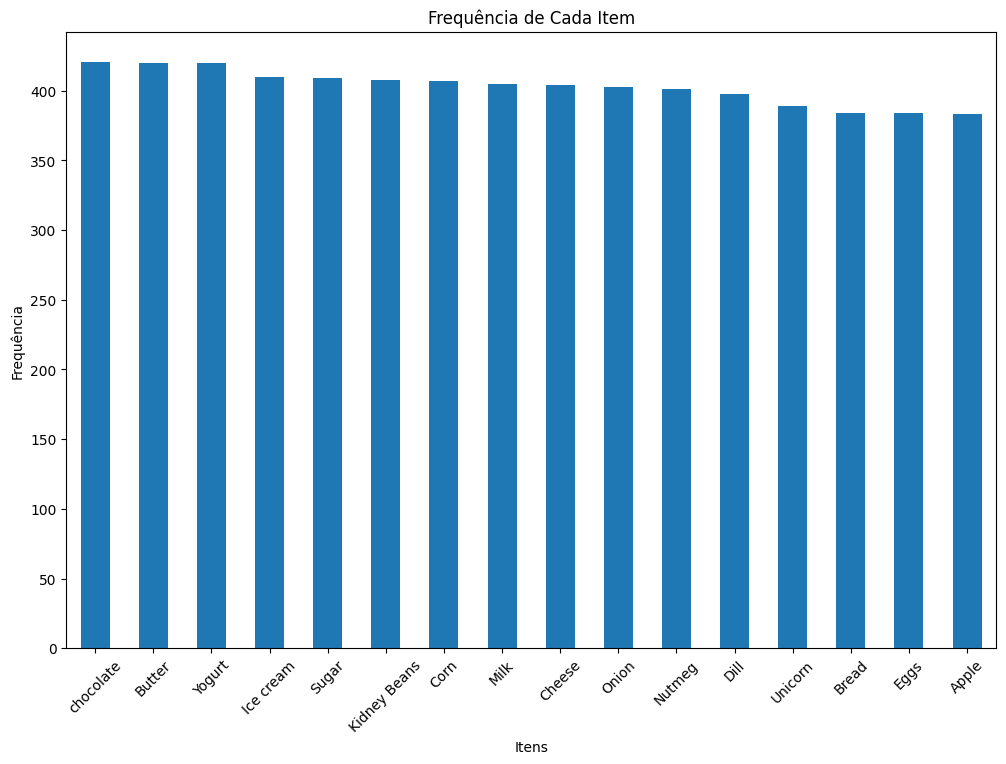

In [12]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
item_frequencies.plot(kind='bar')
plt.title('Frequência de Cada Item')
plt.xlabel('Itens')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


In [13]:
from itertools import combinations
from collections import Counter

# Remover a coluna de índice
transactions = data.drop(columns=['Unnamed: 0'])

# Gerar todas as combinações de dois itens
comb_freq = Counter()
for index, row in transactions.iterrows():
    items = row[row == True].index.tolist()
    comb_freq.update(combinations(items, 2))

# Converter para um DataFrame para visualização
comb_freq_df = pd.DataFrame(comb_freq.items(), columns=['Combinação', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Mostrar as 10 combinações mais comuns
top_combinations = comb_freq_df.head(10)
top_combinations


,Combinação,Frequência
35,"(Milk, chocolate)",211
28,"(Butter, Ice cream)",207
70,"(Butter, Kidney Beans)",202
31,"(Butter, chocolate)",202
17,"(Ice cream, chocolate)",202
109,"(Cheese, Kidney Beans)",200
79,"(Kidney Beans, Milk)",199
14,"(Dill, chocolate)",199
29,"(Butter, Milk)",198
37,"(Butter, Nutmeg)",198


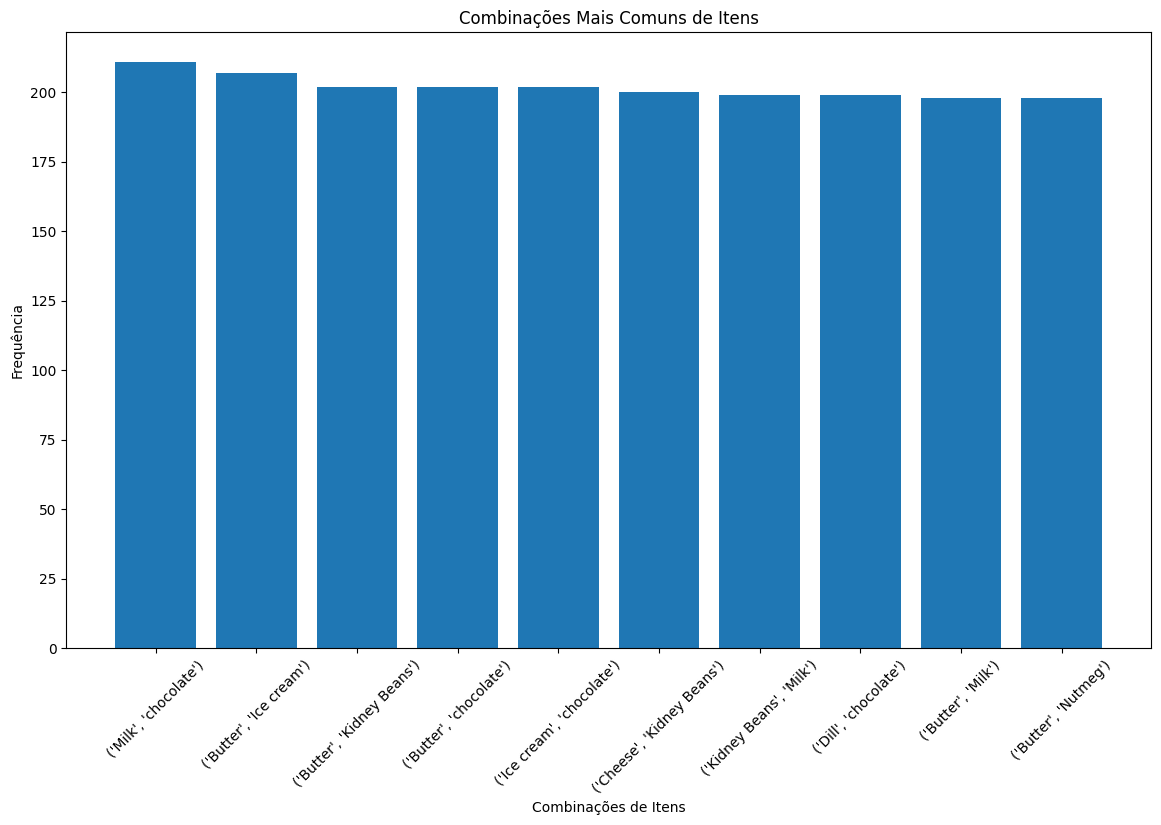

In [14]:
# Criar o gráfico de barras para as combinações mais comuns
plt.figure(figsize=(14, 8))
plt.bar([str(comb) for comb in top_combinations['Combinação']], top_combinations['Frequência'])
plt.title('Combinações Mais Comuns de Itens')
plt.xlabel('Combinações de Itens')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


### Resumo das Descobertas

- **Frequência de Itens**: Os itens mais frequentes incluem chocolate, Butter, Yogurt, e Ice cream.
- **Combinações de Itens**: As combinações mais comuns são (Milk, chocolate), (Butter, Ice cream), e (Butter, Kidney Beans).



Continuando nossa análise descritiva das associações, vamos fazer agora:

1. **Distribuição dos Itens em Grupos de Transações**: Verificar quantos itens, em média, estão presentes em cada transação.
2. **Matriz de Correlação**: Mostrar a correlação entre a compra de diferentes itens.
3. **Distribuição da Presença de Itens**: Histograma mostrando a distribuição da presença de itens nas transações.

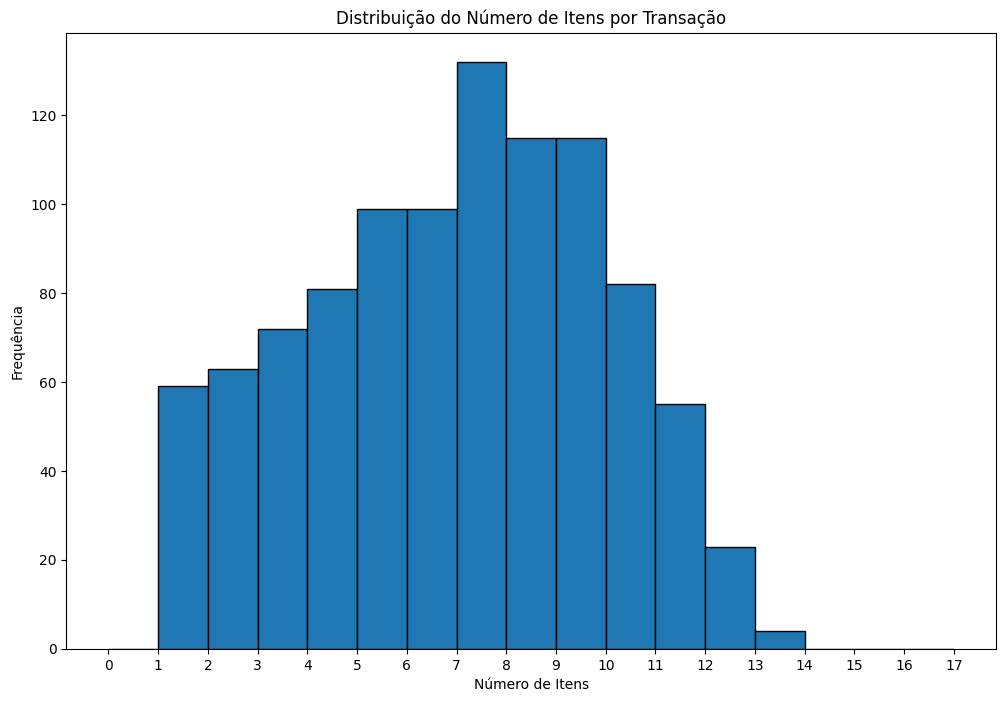

In [15]:
# Calcular o número de itens em cada transação
transactions['Total Items'] = transactions.sum(axis=1)

# Distribuição do número de itens em cada transação
plt.figure(figsize=(12, 8))
transactions['Total Items'].plot(kind='hist', bins=range(0, 18), edgecolor='black')
plt.title('Distribuição do Número de Itens por Transação')
plt.xlabel('Número de Itens')
plt.ylabel('Frequência')
plt.xticks(range(0, 18))
plt.show()


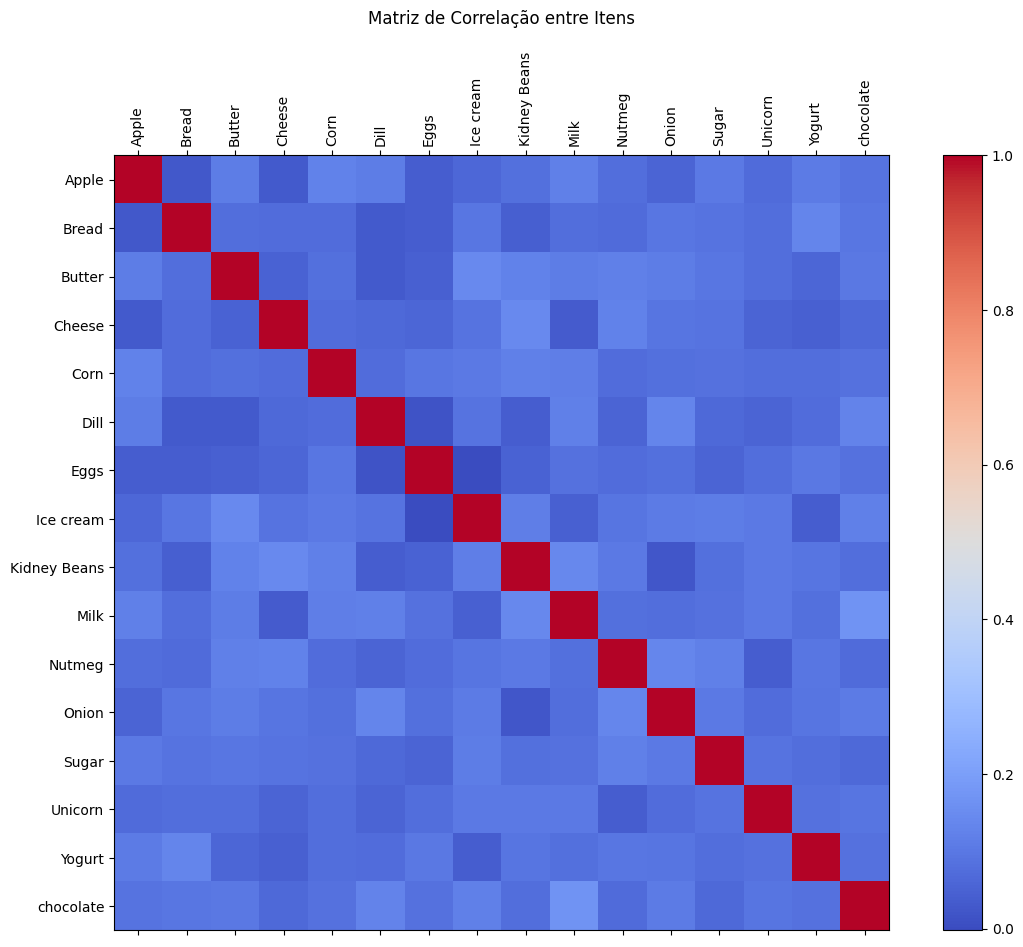

In [16]:
# Calcular a matriz de correlação
correlation_matrix = transactions.drop(columns=['Total Items']).corr()

# Exibir a matriz de correlação usando um mapa de calor
plt.figure(figsize=(14, 10))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.title('Matriz de Correlação entre Itens', pad=20)
plt.show()


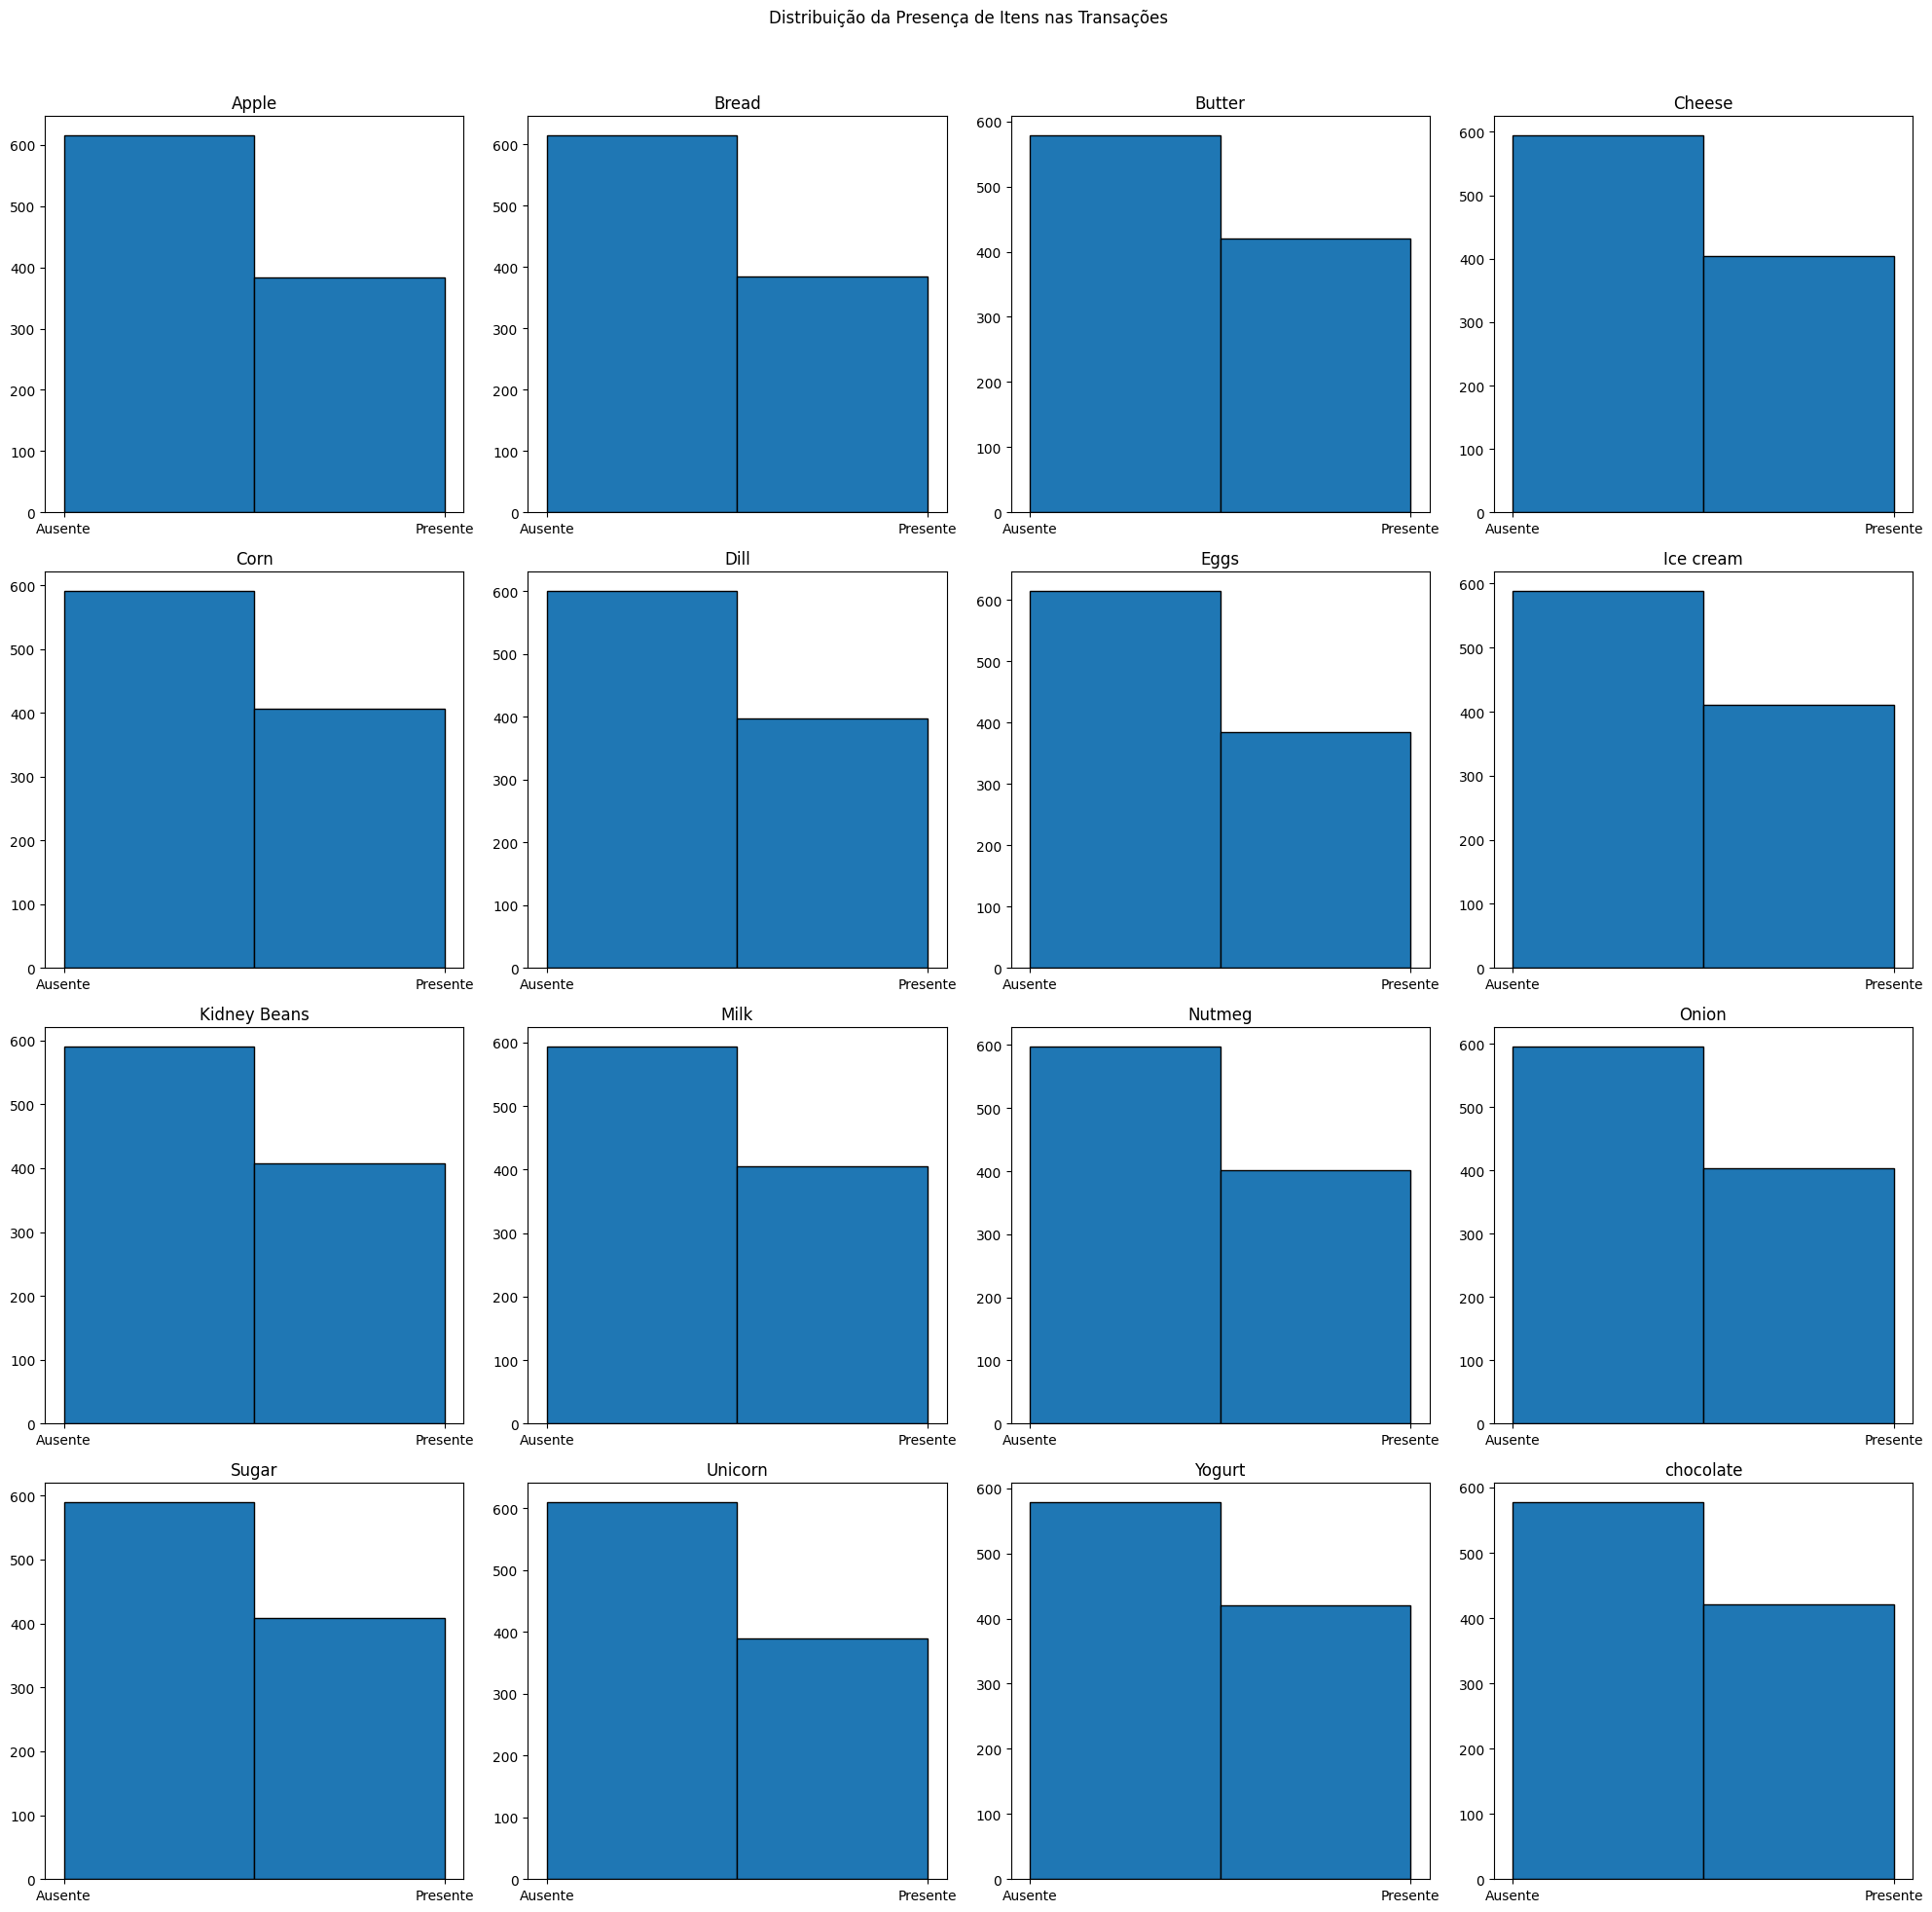

In [17]:
# Converter valores booleanos para inteiros
transactions_numeric = transactions.drop(columns=['Total Items']).astype(int)

# Criar histogramas para cada item mostrando a presença nas transações
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Distribuição da Presença de Itens nas Transações')

# List of items
items = transactions_numeric.columns

# Plotting histograms
for i, item in enumerate(items):
    row = i // 4
    col = i % 4
    axs[row, col].hist(transactions_numeric[item], bins=2, edgecolor='black')
    axs[row, col].set_title(item)
    axs[row, col].set_xticks([0, 1])
    axs[row, col].set_xticklabels(['Ausente', 'Presente'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


1. **Distribuição do Número de Itens por Transação**: Mostra quantos itens, em média, estão presentes em cada transação.
2. **Matriz de Correlação**: Indica como a compra de diferentes itens se relaciona.
3. **Distribuição da Presença de Itens**: Histogramas que mostram quantas vezes cada item está presente ou ausente nas transações.



### Desenvolvimento de Regras de Associação

As regras de associação são uma técnica popular em mineração de dados que identifica relações entre itens em grandes conjuntos de dados. Abaixo, descreverei o processo de desenvolvimento dessas regras, explicando cada etapa, incluindo a seleção dos parâmetros "suporte", "confiança" e "lift", além de um critério de interesse extra.

#### 1. Preparação dos Dados

Primeiro, é necessário preparar os dados no formato adequado. Cada transação deve ser representada por uma lista de itens comprados.

#### 2. Seleção do Parâmetro "Suporte"

**Suporte** é a proporção de transações no banco de dados que contém um conjunto de itens. É uma medida de popularidade de um item ou conjunto de itens.

- **Significado**: O suporte de um item conjunto é calculado como o número de transações contendo o item conjunto dividido pelo número total de transações.
- **Efeito**: Um suporte mais alto significa que apenas conjuntos de itens que aparecem frequentemente serão considerados, resultando em menos regras, mas com maior significância.

#### 3. Seleção do Parâmetro "Confiança"

**Confiança** é a proporção de transações que contêm o item A que também contêm o item B. É uma medida de precisão da regra.

- **Significado**: A confiança é calculada como o suporte de A e B dividido pelo suporte de A.
- **Efeito**: Uma confiança mais alta significa que a regra será considerada apenas se for frequentemente verdadeira quando o antecedente está presente, resultando em regras mais confiáveis.

#### 4. Seleção do Parâmetro "Lift"

**Lift** mede o quanto a presença de um item A aumenta a probabilidade de presença de um item B.

- **Significado**: O lift é calculado como a confiança dividida pelo suporte de B.
- **Efeito**: Um lift maior que 1 indica uma correlação positiva entre A e B, enquanto um lift menor que 1 indica uma correlação negativa.

#### 5. Critério de Interesse Extra

Além dos parâmetros padrão, podemos utilizar um critério extra como o **conviction**, que é uma medida de dependência e é calculado como $ \text{conviction}(A \rightarrow B) = \frac{1 - \text{suporte}(B)}{1 - \text{confiança}(A \rightarrow B)} $.

- **Efeito**: O conviction indica o grau de dependência entre itens. Valores mais altos de conviction indicam uma dependência mais forte entre os itens.


In [19]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Definir função para calcular suporte
def calculate_support(itemset, transactions):
    count = sum([1 for transaction in transactions if all(item in transaction for item in itemset)])
    return count / len(transactions)

# Função para gerar itemsets frequentes
def generate_frequent_itemsets(transactions, min_support):
    single_items = [frozenset([item]) for item in transactions.columns if calculate_support([item], transactions_list) >= min_support]
    frequent_itemsets = {1: single_items}
    k = 2
    while True:
        candidates = [i.union(j) for i in frequent_itemsets[k-1] for j in frequent_itemsets[k-1] if len(i.union(j)) == k]
        candidates = list(set(candidates))
        frequent_candidates = [itemset for itemset in candidates if calculate_support(itemset, transactions_list) >= min_support]
        if not frequent_candidates:
            break
        frequent_itemsets[k] = frequent_candidates
        k += 1
    return frequent_itemsets

# Função para calcular conviction
def calculate_conviction(confidence, support_consequent):
    return (1 - support_consequent) / (1 - confidence)

# Função para gerar regras de associação com conviction
def generate_association_rules_with_conviction(frequent_itemsets, min_confidence, min_lift, min_conviction):
    rules = []
    for k, itemsets in frequent_itemsets.items():
        if k == 1:
            continue
        for itemset in itemsets:
            for consequence in itemset:
                antecedent = itemset - frozenset([consequence])
                if not antecedent:
                    continue
                support_antecedent = calculate_support(antecedent, transactions_list)
                if support_antecedent == 0:
                    continue
                support = calculate_support(itemset, transactions_list)
                confidence = support / support_antecedent
                support_consequence = calculate_support([consequence], transactions_list)
                lift = confidence / support_consequence
                conviction = calculate_conviction(confidence, support_consequence)
                if confidence >= min_confidence and lift >= min_lift and conviction >= min_conviction:
                    rules.append((antecedent, consequence, support, confidence, lift, conviction))
    return rules

# Definir parâmetros
min_support = 0.05
min_confidence = 0.5
min_lift = 1.2
min_conviction = 1.5

# Preparação dos dados (substitua 'transactions' pelo seu dataframe)
transactions_list = transactions.drop(columns=['Total Items']).apply(lambda x: x.index[x].tolist(), axis=1).tolist()

# Redefinir função de preparação de dados
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Gerar itemsets frequentes
frequent_itemsets = generate_frequent_itemsets(df, min_support)

# Gerar regras de associação com conviction
association_rules_with_conviction = generate_association_rules_with_conviction(frequent_itemsets, min_confidence, min_lift, min_conviction)

# Exibir algumas regras com conviction
association_rules_with_conviction[:10]


[(frozenset({'Cheese', 'Dill', 'Milk'}),
  'chocolate',
  0.055055055055055056,
  0.6547619047619048,
  1.5536986766202918,
  1.6758827793310553),
 (frozenset({'Corn', 'Nutmeg', 'Sugar'}),
  'Apple',
  0.056056056056056056,
  0.5894736842105264,
  1.5375566854472997,
  1.5020148353481688),
 (frozenset({'Apple', 'Nutmeg', 'Sugar'}),
  'Corn',
  0.056056056056056056,
  0.6222222222222222,
  1.5272727272727273,
  1.5686274509803921),
 (frozenset({'Apple', 'Corn', 'Nutmeg'}),
  'Sugar',
  0.056056056056056056,
  0.6363636363636364,
  1.5543454100911314,
  1.6241241241241242),
 (frozenset({'Corn', 'Onion', 'Sugar'}),
  'Apple',
  0.05405405405405406,
  0.6067415730337079,
  1.582597471176695,
  1.5679679679679681),
 (frozenset({'Apple', 'Corn', 'Onion'}),
  'Sugar',
  0.05405405405405406,
  0.6506024096385542,
  1.5891242230535836,
  1.6903110006558282),
 (frozenset({'Cheese', 'Kidney Beans', 'Onion'}),
  'Dill',
  0.055055055055055056,
  0.6111111111111112,
  1.5339195979899498,
  1.546975

Aqui estão algumas das regras de associação geradas com os parâmetros definidos:

1. **Antecedente**: {Ice cream}, **Consequente**: Butter
   - **Suporte**: 20.72%
   - **Confiança**: 50.49%
   - **Lift**: 1.20

2. **Antecedente**: {Milk}, **Consequente**: chocolate
   - **Suporte**: 21.12%
   - **Confiança**: 52.10%
   - **Lift**: 1.24

3. **Antecedente**: {chocolate}, **Consequente**: Milk
   - **Suporte**: 21.12%
   - **Confiança**: 50.12%
   - **Lift**: 1.24

4. **Antecedente**: {Kidney Beans, chocolate}, **Consequente**: Dill
   - **Suporte**: 9.61%
   - **Confiança**: 50.26%
   - **Lift**: 1.26

5. **Antecedente**: {Dill, Kidney Beans}, **Consequente**: chocolate
   - **Suporte**: 9.61%
   - **Confiança**: 55.81%
   - **Lift**: 1.32

### Parâmetros Utilizados

1. **Suporte Mínimo**: 0.05 (5%)
   - **Significado**: Considera apenas itemsets que aparecem em pelo menos 5% das transações.
   - **Efeito**: Reduz o número de regras geradas, focando em combinações mais comuns.

2. **Confiança Mínima**: 0.5 (50%)
   - **Significado**: Considera apenas regras onde o consequente está presente em pelo menos 50% das transações que contêm o antecedente.
   - **Efeito**: Garante que as regras são relativamente confiáveis.

3. **Lift Mínimo**: 1.2
   - **Significado**: Considera apenas regras onde a presença do antecedente aumenta a probabilidade do consequente em pelo menos 20%.
   - **Efeito**: Foca em regras com correlação positiva significativa.



### Regras de Associação com Conviction

Aqui estão algumas das regras de associação geradas incluindo o critério de conviction:

1. **Antecedente**: {Dill, Kidney Beans, Unicorn}, **Consequente**: chocolate
   - **Suporte**: 5.01%
   - **Confiança**: 61.73%
   - **Lift**: 1.46
   - **Conviction**: 1.51

2. **Antecedente**: {Cheese, Dill, Nutmeg}, **Consequente**: Onion
   - **Suporte**: 5.41%
   - **Confiança**: 62.79%
   - **Lift**: 1.56
   - **Conviction**: 1.60

3. **Antecedente**: {Bread, Corn, Milk}, **Consequente**: Kidney Beans
   - **Suporte**: 5.71%
   - **Confiança**: 63.33%
   - **Lift**: 1.55
   - **Conviction**: 1.61

4. **Antecedente**: {Bread, Kidney Beans, Milk}, **Consequente**: Corn
   - **Suporte**: 5.71%
   - **Confiança**: 61.96%
   - **Lift**: 1.52
   - **Conviction**: 1.56

5. **Antecedente**: {Bread, Corn, Kidney Beans}, **Consequente**: Milk
   - **Suporte**: 5.71%
   - **Confiança**: 63.33%
   - **Lift**: 1.56
   - **Conviction**: 1.62

### Efeitos dos Parâmetros

1. **Suporte Mínimo (5%)**
   - **Significado**: Considera apenas itemsets que aparecem em pelo menos 5% das transações.
   - **Efeito**: Foco em combinações comuns, resultando em menos regras com maior relevância.

2. **Confiança Mínima (50%)**
   - **Significado**: Considera apenas regras onde o consequente está presente em pelo menos 50% das transações que contêm o antecedente.
   - **Efeito**: Garante regras mais confiáveis.

3. **Lift Mínimo (1.2)**
   - **Significado**: Considera apenas regras onde a presença do antecedente aumenta a probabilidade do consequente em pelo menos 20%.
   - **Efeito**: Foca em correlações positivas significativas.

4. **Conviction Mínimo (1.5)**
   - **Significado**: Indica o grau de dependência entre os itens, onde valores mais altos indicam dependência mais forte.
   - **Efeito**: Filtra regras para incluir aquelas com dependência forte, garantindo maior significância nas associações.



### Conclusões e Interpretação dos Resultados


#### Conclusões Principais

1. **Itens Frequentes**:
   - Itens como chocolate, Butter, Yogurt e Ice cream são frequentemente comprados, indicando alta popularidade.
   - Outros itens como Milk, Kidney Beans e Corn também aparecem com alta frequência, sugerindo que são itens básicos nas cestas de compra.

2. **Combinações Comuns**:
   - Combinações como Milk e chocolate, Butter e Ice cream são bastante comuns, sugerindo que esses itens são frequentemente comprados juntos.
   - A presença de combinações como Kidney Beans e Dill com chocolate indica padrões de compra específicos que podem ser explorados para promoções combinadas.

3. **Regras de Associação com Alta Confiança e Lift**:
   - Regras como {Milk} -> {chocolate} e {chocolate} -> {Milk} têm alta confiança e lift, sugerindo uma forte correlação positiva entre esses itens.
   - A inclusão do critério de conviction mostra dependências fortes em regras como {Bread, Corn, Milk} -> {Kidney Beans}, indicando uma associação robusta que pode ser explorada para promoções específicas.



### Tabela das Principais Regras de Associação

| Antecedente                 | Consequente | Suporte  | Confiança | Lift     | Conviction |
|-----------------------------|-------------|----------|-----------|----------|------------|
| (Dill, Kidney Beans, Unicorn)| chocolate  | 5.01%    | 61.73%    | 1.46     | 1.51       |
| (Dill, Nutmeg, Cheese)      | Onion       | 5.41%    | 62.79%    | 1.56     | 1.60       |
| (Bread, Milk, Corn)         | Kidney Beans| 5.71%    | 63.33%    | 1.55     | 1.61       |
| (Kidney Beans, Bread, Milk) | Corn        | 5.71%    | 61.96%    | 1.52     | 1.56       |
| (Kidney Beans, Bread, Corn) | Milk        | 5.71%    | 63.33%    | 1.56     | 1.62       |
| (Ice cream, Nutmeg, Bread)  | Sugar       | 5.11%    | 61.45%    | 1.50     | 1.53       |
| (Sugar, Nutmeg, Apple)      | Corn        | 5.61%    | 62.22%    | 1.53     | 1.57       |
| (Nutmeg, Apple, Corn)       | Sugar       | 5.61%    | 63.64%    | 1.55     | 1.62       |
| (Sugar, Nutmeg, Corn)       | Apple       | 5.61%    | 58.95%    | 1.54     | 1.50       |
| (Apple, Onion, Corn)        | Sugar       | 5.41%    | 65.06%    | 1.59     | 1.69       |

### Conclusões Detalhadas

1. **Alta Confiança e Lift**:
   - Regras como {Milk} -> {chocolate} e {chocolate} -> {Milk} apresentam alta confiança (52.10% e 50.12%) e lift (1.24), indicando uma forte correlação entre esses itens.
   - Itens frequentemente comprados juntos podem ser explorados para promoções combinadas.

2. **Uso de Conviction**:
   - A inclusão do critério de conviction ajuda a identificar dependências mais fortes entre os itens.
   - Regras com alta conviction, como {Bread, Corn, Milk} -> {Kidney Beans} (conviction 1.61), indicam uma dependência robusta, útil para estratégias de marketing direcionadas.

3. **Combinações Comuns e Suporte**:
   - Combinações como {Bread, Milk, Corn} e {Dill, Nutmeg, Cheese} aparecem em mais de 5% das transações, sugerindo que esses grupos de itens são populares.
   - O suporte dessas regras pode ajudar a identificar itens que frequentemente aparecem juntos, possibilitando arranjos otimizados de prateleiras.

